# Maestría en Inteligencia Artificial Aplicada

# TC 4033: Visión computacional para imágenes y video

# Tecnológico de Monterrey

## Dr. Gilberto Ochoa Ruiz

# **9. Image Matching**

## **Equipo # 16**
### Edwin David Hernández Alejandre A01794692
### Miguel Guillermo Galindo Orozco A01793695
### Jorge Pedroza Rivera A01319553
### Juan Carlos Alvarado Carricarte A01793486
### Gerardo Aaron Castañeda Jaramillo A01137646

## Table of Contents
1. [Libraries](#libraries)
2. [ORB Matching](#orb)
3. [SIFT Matching](#sift)
4. [Ejercicio](#ejercicio)
* [Ejemplo 1](#ejemplo1)
* [Ejemplo 2](#ejemplo2)
5. [Conclusiones](#conclusiones)
6. [Referencias](#referencias)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# ORB (Oriented FAST and Rotated BRIEF) <a class="anchor" id="orb" ></a>

- Developed at OpenCV labs by Ethan Rublee, Vincent Rabaud, Kurt Konolige, and Gary R. Bradski in 2011
- Efficient and viable alternative to SIFT and SURF (patented algorithms)
- ORB is free to use
- Feature detection
- ORB builds on FAST keypoint detector + BRIEF descriptor

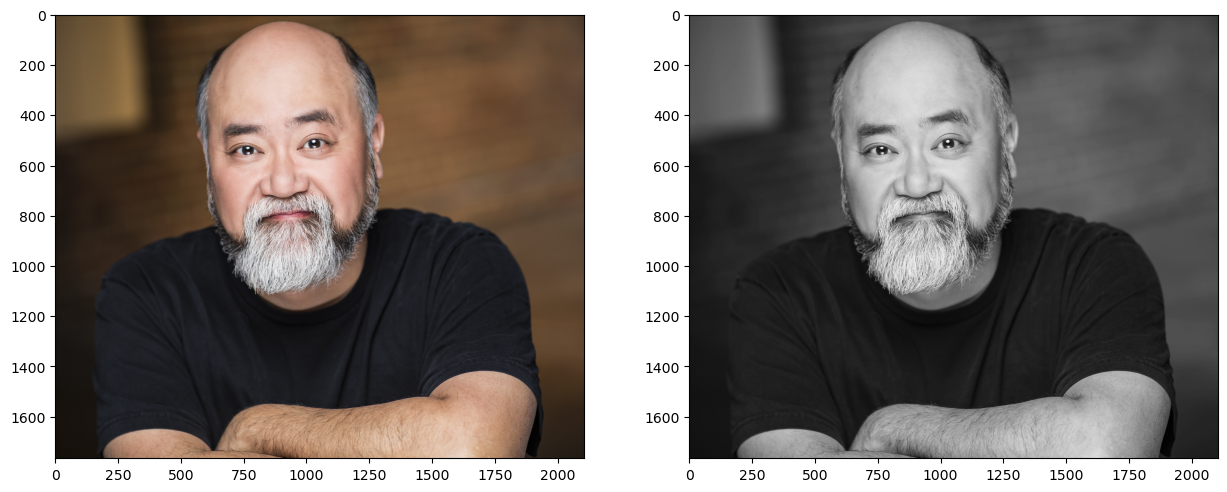

In [30]:
#reading image
img = cv2.imread('data/iroh_1.jpg')  
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")

### Create test image by adding Scale Invariance and Rotational Invariance

In [31]:
test_image = cv2.pyrDown(img_color)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

### Display traning image and testing image

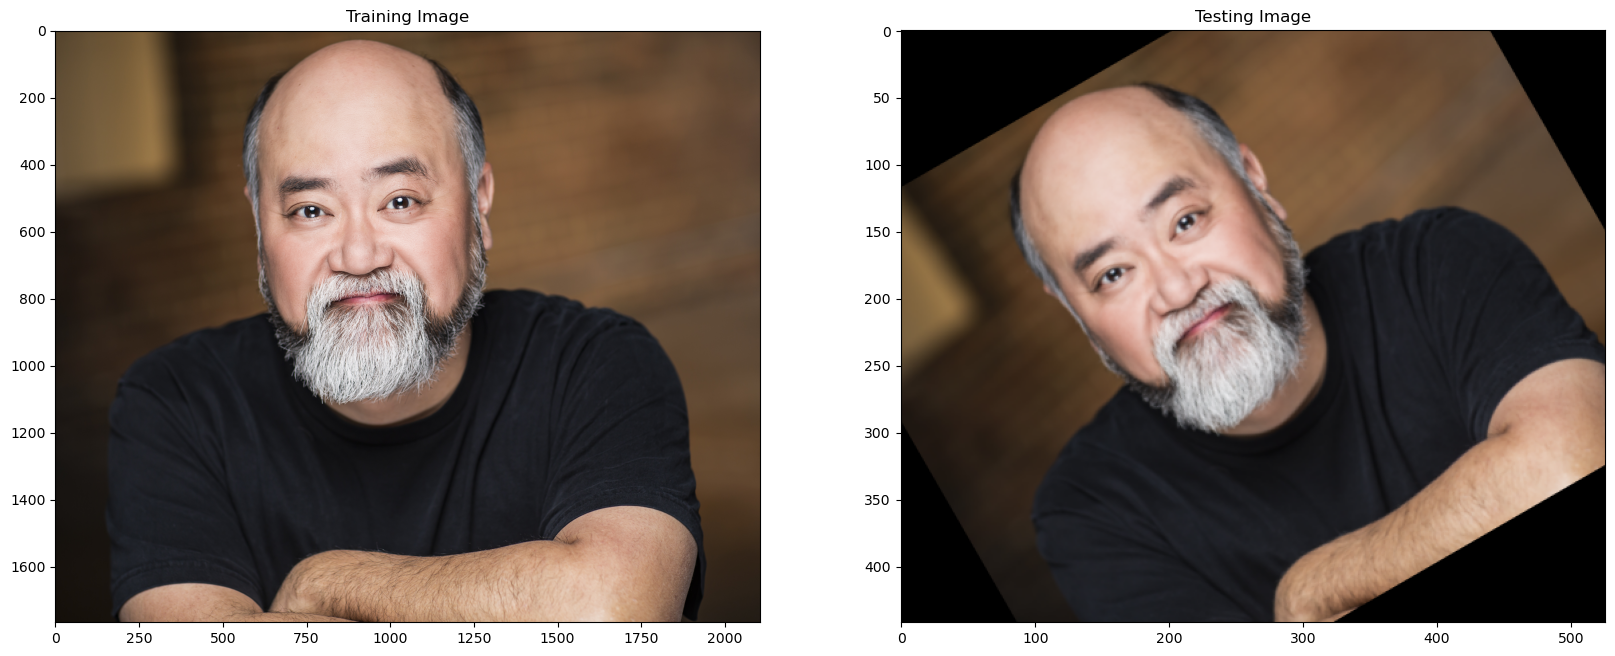

In [32]:
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(img_color)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

### ORB

In [33]:
orb = cv2.ORB_create()

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  500


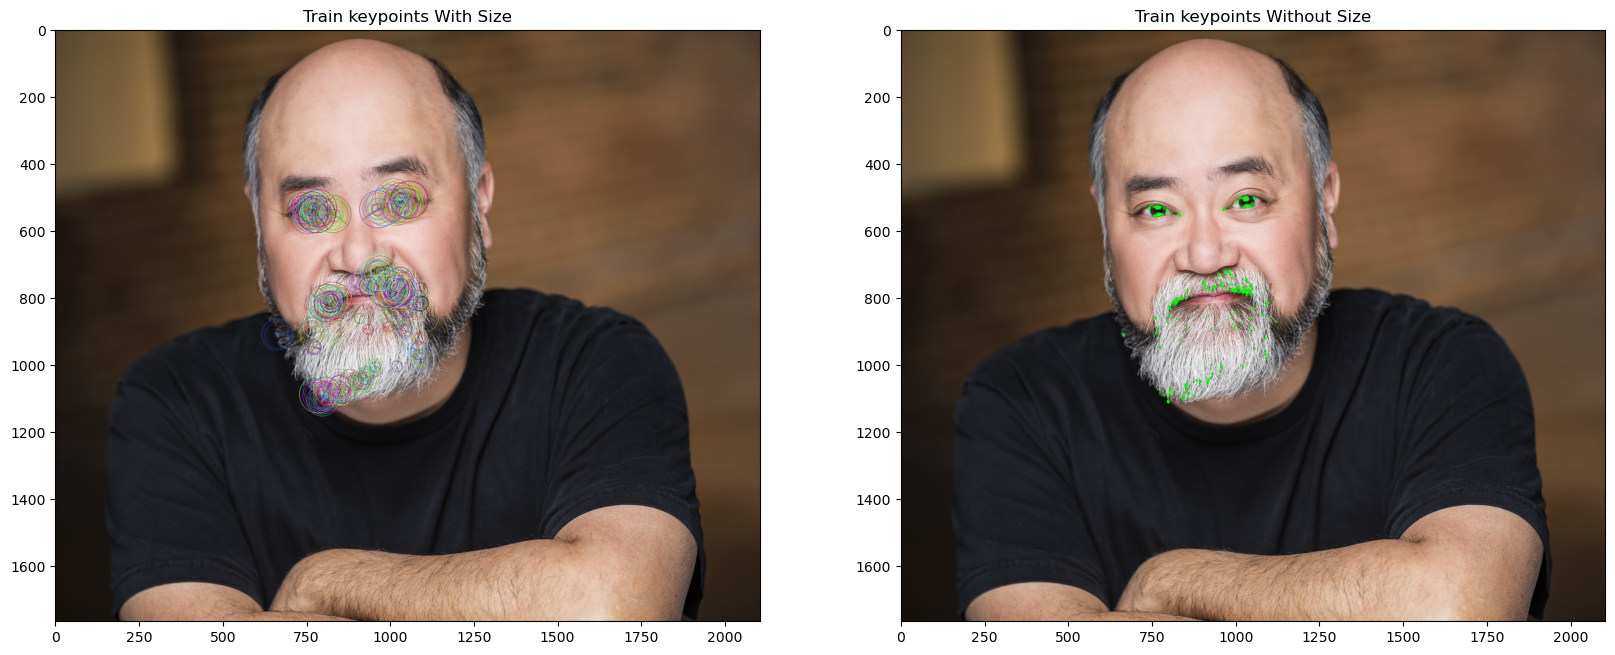

In [34]:
train_keypoints, train_descriptor = orb.detectAndCompute(img_color, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(img_color)
keypoints_with_size = np.copy(img_color)

cv2.drawKeypoints(img_color, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(img_color, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

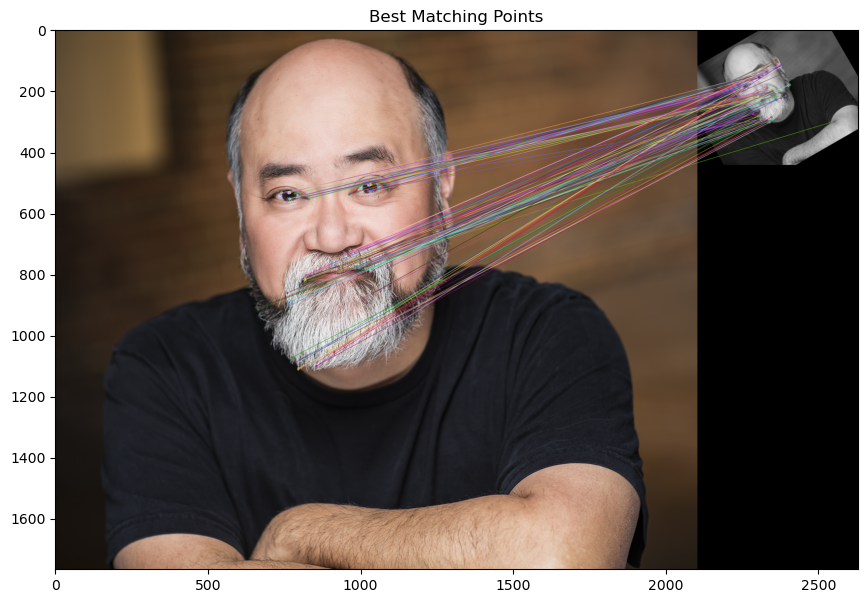


Number of Matching Keypoints Between The Training and Query Images:  113


In [35]:

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(img_color, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## SIFT Matching (Scale Invariant Feature Transform) <a class="anchor" id="sift" ></a>

In [36]:
img1 = cv2.imread('data/iroh_1.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

### Matching different images

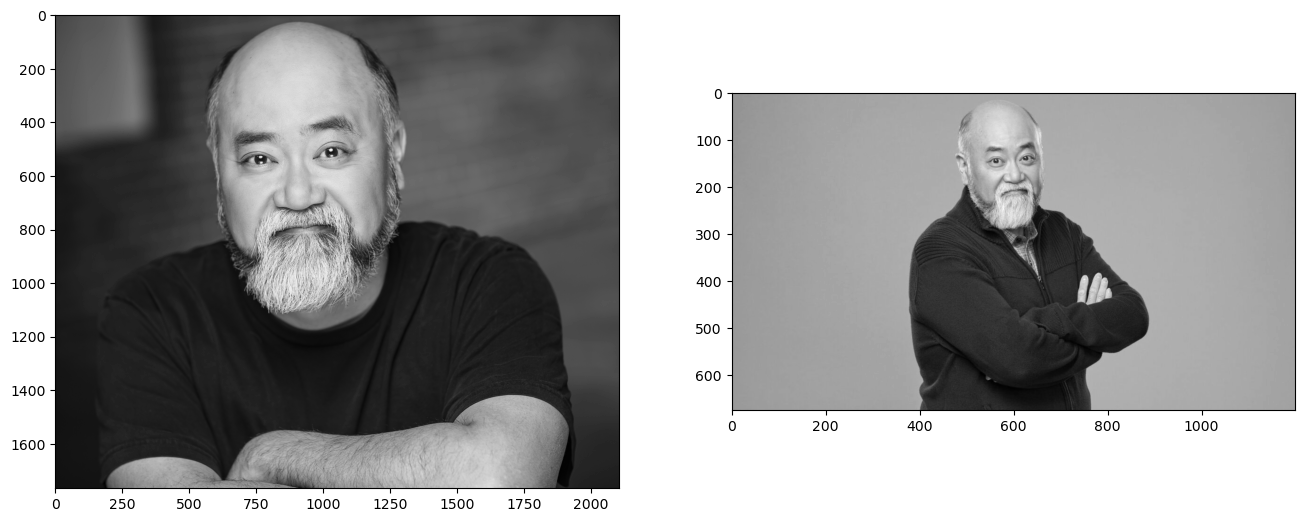

In [38]:
# read images
img1 = cv2.imread('data/iroh_1.jpg')  
img2 = cv2.imread('data/iroh_2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

### Extracting Keypoints with SIFT

In [39]:
#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(4093, 428)

### Feature Matching

In [40]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

(<matplotlib.image.AxesImage at 0x189e8206d10>, None)

## Ejercicio <a class="anchor" id="ejercicio" ></a>

En cuanto al Collab de matching, no se espera tampoco que se haga ninguna modificación al código, pero la idea es probar que tan buenos son los diferentes descriptores para hacer matching de imagenes. Se sugiere usar las imágenes con variaciones de iluminación y orientación y ver que tan bien se hace el matching con Harris por si mismo, o con otros descriptores como SIFT u ORB. Discuta sus hallazgos

## Ejemplo 1 <a class="anchor" id="ejemplo1" ></a>

Primero probamos el método utilizando una imagen de un cerdo de plástico, donde se rota y se cambia la escala de la imagen.

In [59]:
img1 = cv2.imread('data/pig_10.jpg')  
img2 = cv2.imread('data/pig_11.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

### ORB

In [64]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(img1, None)
test_keypoints, test_descriptor = orb.detectAndCompute(img2, None)

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(img1, train_keypoints, img2, test_keypoints, matches, img2, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))


Number of Matching Keypoints Between The Training and Query Images:  125


### SIFT

In [45]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(30452, 6293)

**Feature Matching**

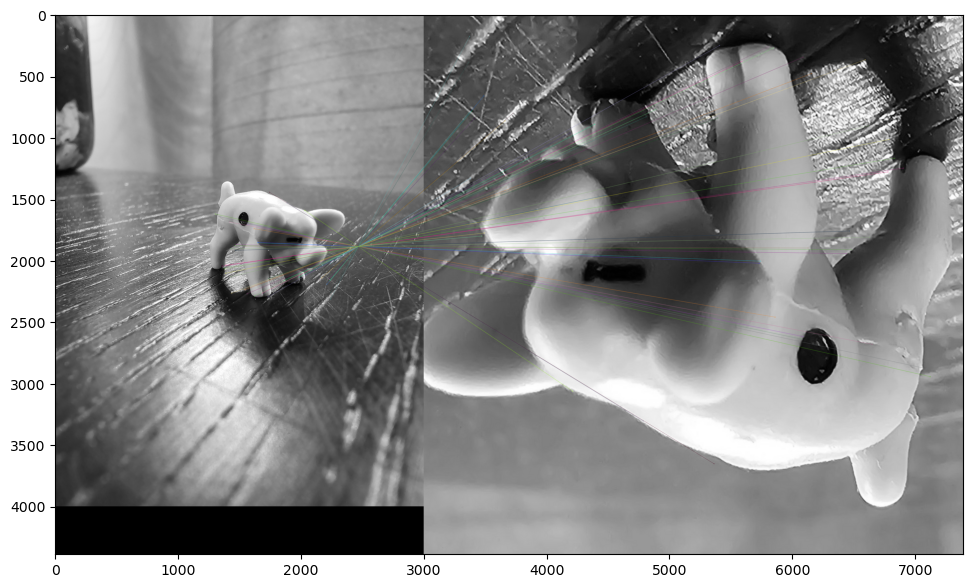

(<matplotlib.image.AxesImage at 0x18980acbe50>, None)

In [46]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

## Ejemplo 2 <a class="anchor" id="ejemplo2" ></a>

Como segundo ejemplo, probamos le mismo objeto rotándolo un poco. 

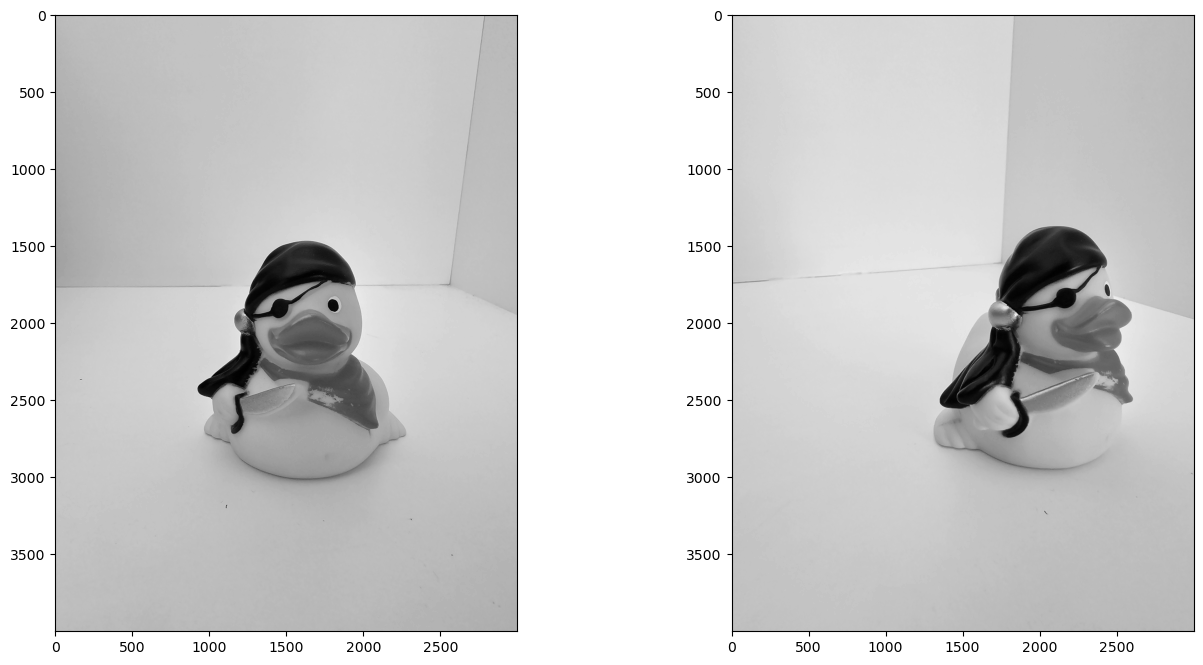

In [65]:
img1 = cv2.imread('data/duck_1.jpg')  
img2 = cv2.imread('data/duck_2.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

### ORB

In [66]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(img1, None)
test_keypoints, test_descriptor = orb.detectAndCompute(img2, None)

# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(img1, train_keypoints, img2, test_keypoints, matches, img2, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))


Number of Matching Keypoints Between The Training and Query Images:  112


### SIFT

In [57]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(2408, 2261)

**Feature Matching**

In [58]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

(<matplotlib.image.AxesImage at 0x18980b66b90>, None)

# **Conclusiones** <a class="anchor" id="conclusiones" ></a>

 Image matching, o emparejamiento de imágenes, es el proceso de encontrar similitudes entre puntos de interés en dos o mas imágenes. Su objetivo es identificar regiones similares entre imágenes. Es un método útil en visión por computadora. Ayuda con la búsqueda de imágenes, la reconstrucción 3D, el seguimiento de objetos, detección de objetos, entre otros. 
 
* ORB (Oriented FAST and Rotated BRIEF): Mas rápido y eficiente computacionalmente que SIFT. Utiliza métodos más simples.
* SIFT (Scale-Invariant Feature Transform): Algoritmo basado en el espacio de escala y cálculo de descriptores más detallados. 
Es conocido por una mayor robustez a transformaciones geométricas como cambios de escala, rotación e iluminación; a costa de requerir mas recursos computacionales. 

En este caso decidimos usar los dos para poder comparar sus resultados entre ellos. En el ejemplo 1, podemos ver cómo, aunque los dos hacen un buen trabajo, ORB tiende a detectar no solo el objeto, sino que también puntos en la cubierta de madera. Mientras SIFT es mas preciso con su detección de similitudes únicamente en el objeto. En el ejemplo 2, sucede exactamente lo mismo. Los dos métodos funcionan, pero SIFT se limita al objeto, y ORB detecta ruido en la cubierta donde esta el objeto. 

Por lo que se confirma que aunque SIFT es computacionalmente mas exigente, es el que nos da mejores resultados. 


# **Referencias** <a class="anchor" id="referencias" ></a>

* Bradski, G. (2000). The OpenCV Library. Dr. Dobb's Journal of Software Tools.

* Gonzalez, R., & Woods, R. (2018). Digital Image Processing. Pearson.

* OpenCV. (n.d.). Introduction to SIFT (Scale-Invariant Feature Transform). Retrieved from OpenCV: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

* OpenCV. (n.d.). Feature Matching. Retrieved from OpenCV: https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

* OpenCV. (n.d.). ORB (Oriented FAST and Rotated BRIEF). Retrieved from OpenCV: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html